# Avocado is a fruit consumed by people heavily in the United States. 

# Content
*This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.* 

**The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.** 

**Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.** 

**The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.**

**Some relevant columns in the dataset:**

*-Date - The date of the observation*

*-AveragePrice - the average price of a single avocado*

*-type - conventional or organic*

*-year - the year*

*-Region - the city or region of the observation*

*-Total Volume - Total number of avocados sold*

*-4046 - Total number of avocados with PLU 4046 sold*

*-4225 - Total number of avocados with PLU 4225 sold*

*-4770 - Total number of avocados with PLU 4770 sold*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,1/7/2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


**Total 18249 rows and 14 columns we have, from this it is clear we does not have any use of uunamed:0 coloumns so we can remove that.Also Xlarge bags shows 0 value that too we will check later**

In [5]:
# removing data
data.drop('Unnamed: 0',axis=1,inplace=True)
data['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

# Exploratory Data Analysis (EDA)

In [6]:
data.shape

(18249, 13)

In [7]:
data.shape

(18249, 13)

**There are 3 features have object data type and remaining 10 features have numeric data types**

*The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day. Since year column is already been there so no need to separate it.*

In [8]:
# Changing date column from object type to Date Type
data['Date']=pd.to_datetime(data['Date'])

In [9]:
# Now again check the types
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [10]:
# Now Seperate date and month
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data.drop("Date",axis=1,inplace=True)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [11]:
#overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


So, we don't have any missing values.

Column - Date is object type and has date type of data .

Column - AveragePrice, Total Volume,( 4046, 4225, 4770),Total Bags, Small Bags, Large Bags, XLarge Bags are float type and continuous data.

Column - type, year and region are object type and categorical data.

In [12]:
 # Checking number of unique values in each column
data.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [13]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [14]:
# Now let us check any duplicate value present in our data
data.drop_duplicates(inplace=True)
data.shape

(18249, 14)

**o null value , no missing value and no duplicates**

In [15]:
# Checking wheather the dataset contains any space
data.loc[data['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


In [16]:
# Statistical summary of dataset
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


***It is observed that columns like Large Bags and XLarge Bags may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.***

*A higher Std than mean in Total Bags, Small Bags and, XLarge Bags columns indicates skewness.*

# Data Visualization:

In [17]:
# Now seperating numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


In [18]:
# seprerating categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


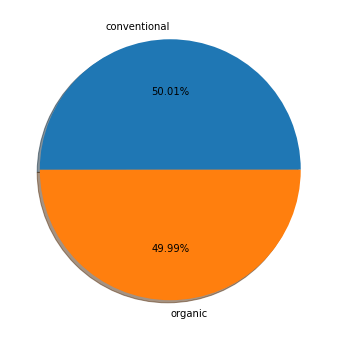

In [19]:
#Visualize the count of 'type'feature of the avocado
print(data["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(data['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

**We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products were not natuaral amd inorganic.But both types have equal demand in market.**

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


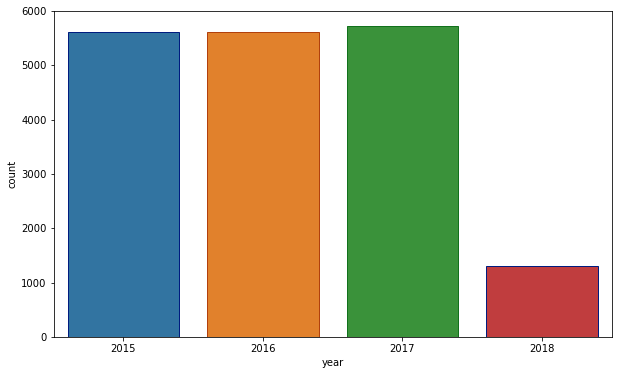

In [20]:
#Visualize the count of year
print(data["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(data["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

**we already mentioned in the problem statement , this data is till May 2018, for the year 2018 the data is very less, and for remaining years the consumption is almost equal**

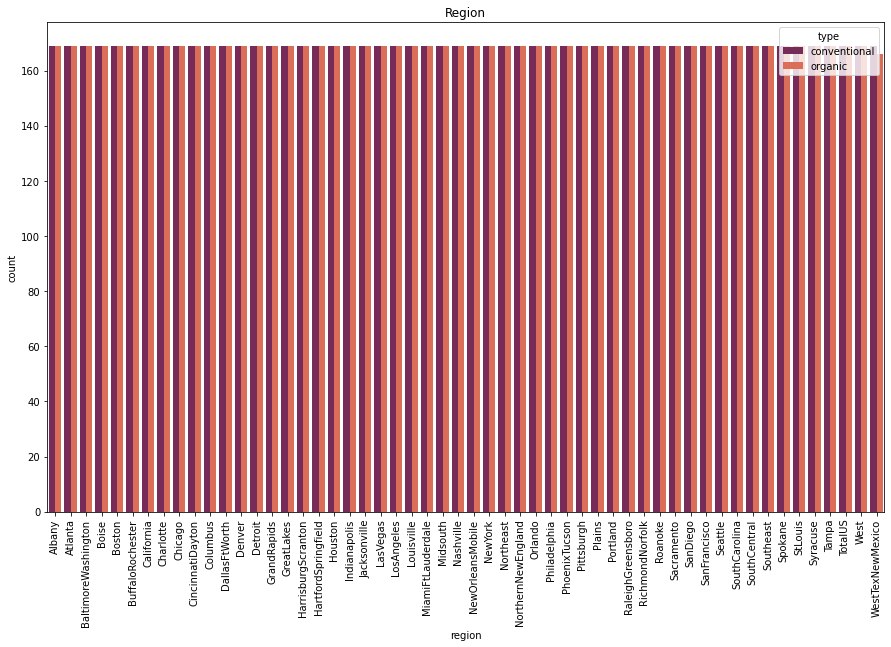

In [21]:
#Visualize the count of Region
plt.figure(figsize=(15,9))
sns.countplot(data["region"],palette="rocket",hue=data['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

***Demand of avacoda is alomst same in every region.***

# The relation between each other by ploting pair pot:

<Figure size 1800x1800 with 0 Axes>

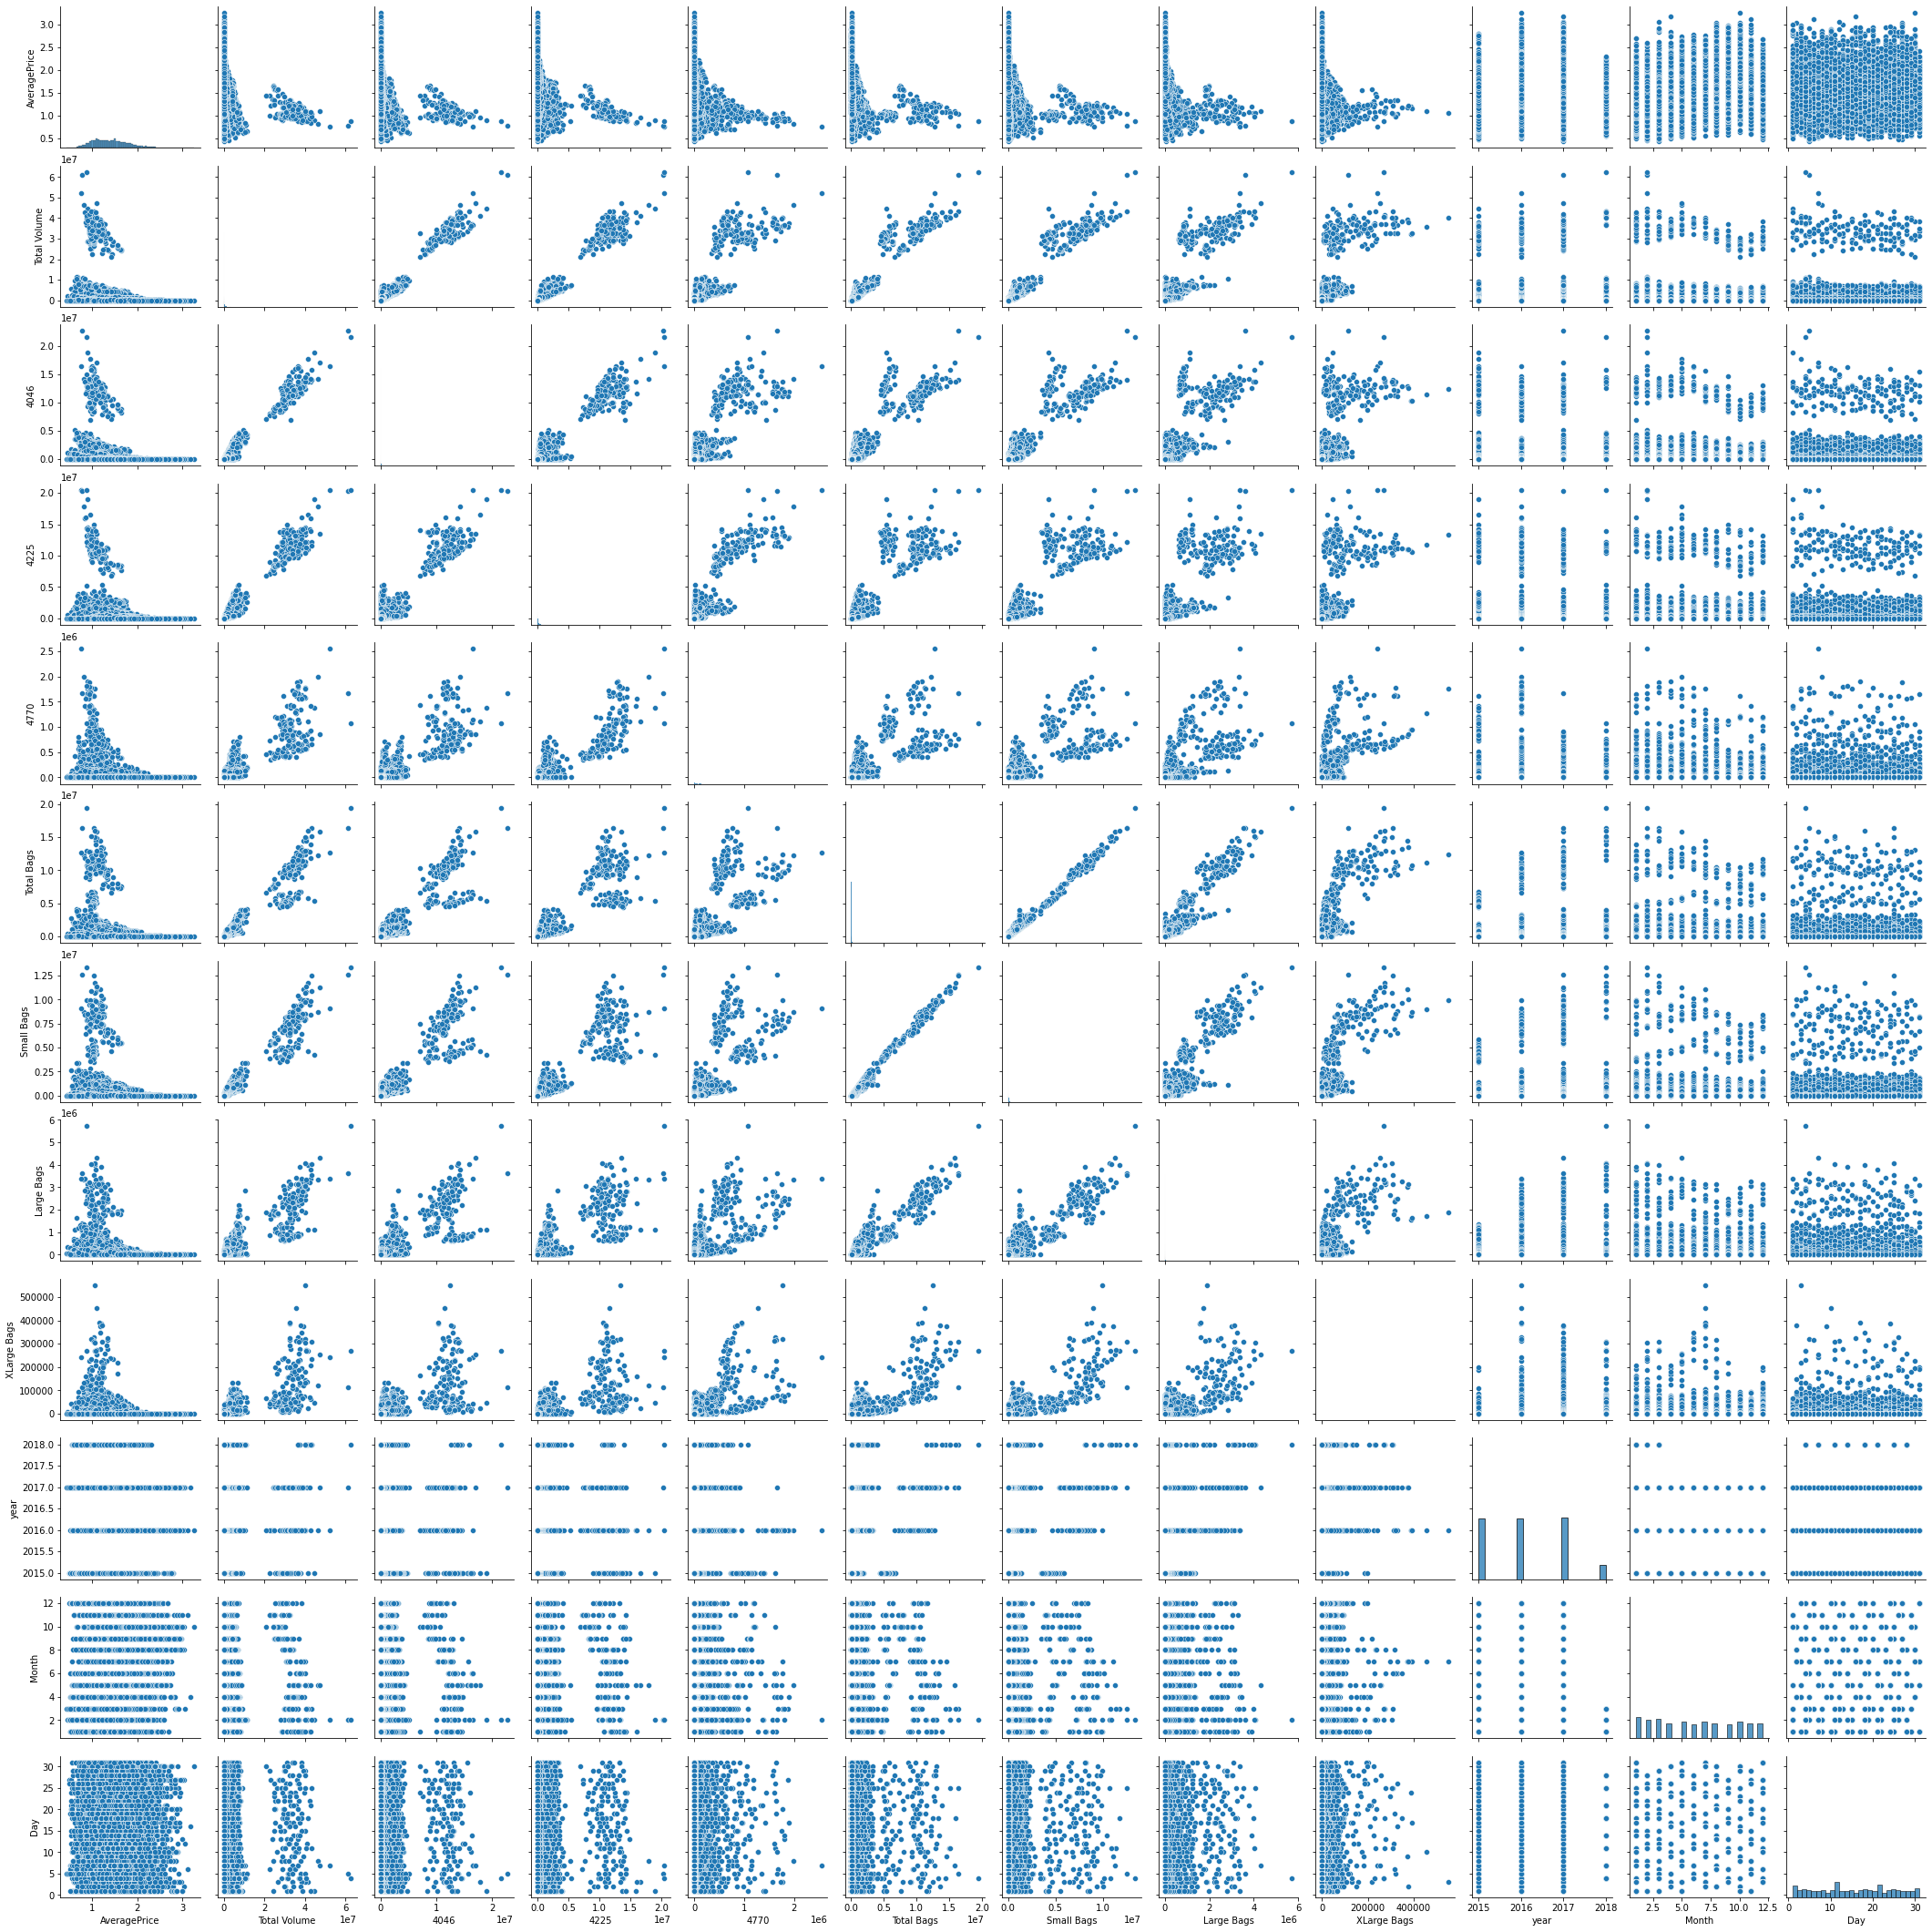

In [22]:
plt.figure(figsize=(25,25))
sns.pairplot(data)
plt.show()

*This figures shows us that there is a strong relation between total bags and small bags
From this figure we can assume that there is high multicolinearity*

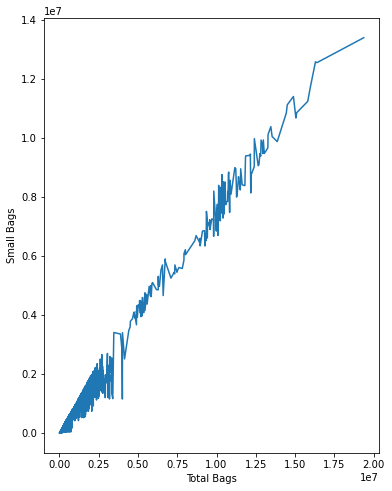

In [24]:
#let us plot pairwise where we feel of high relation:

plt.figure(figsize=(6,8))
sns.lineplot('Total Bags','Small Bags',data=data)
plt.show()

*here is high relation between these two, This means most of the customers were using small bags.*

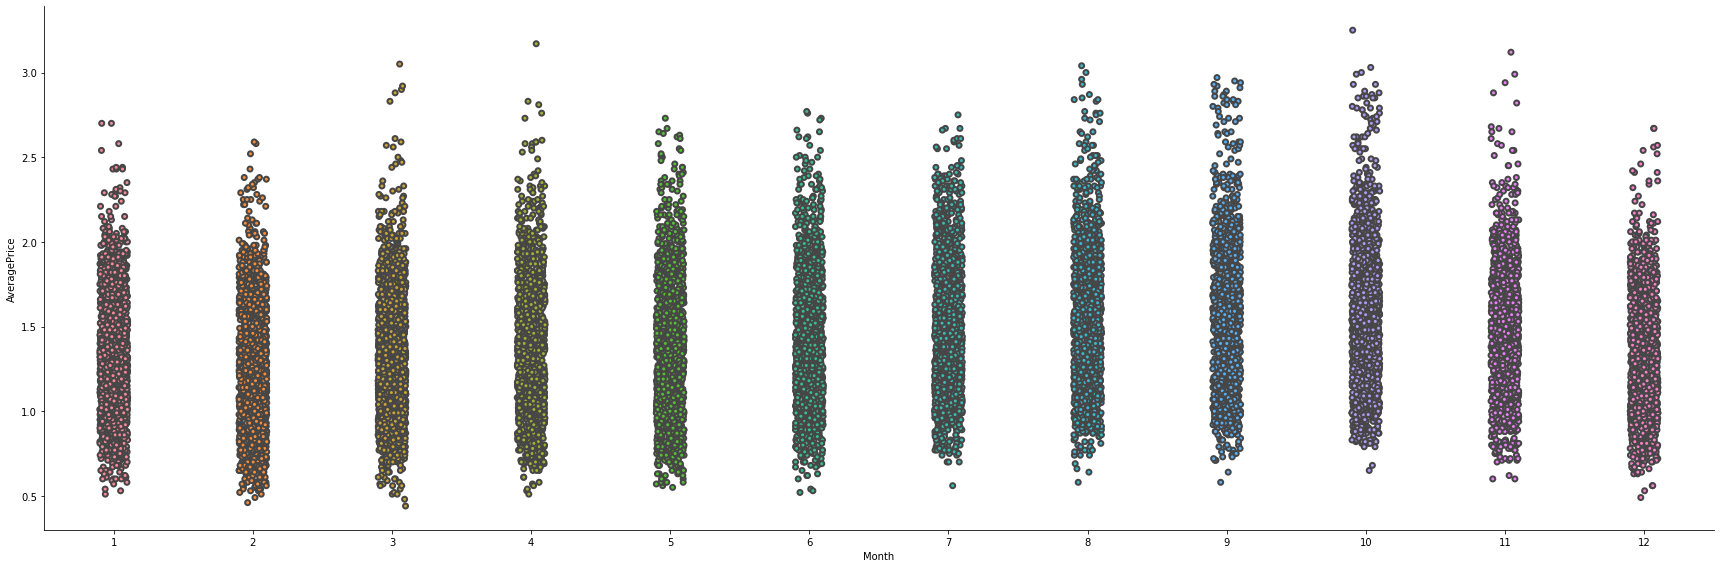

In [25]:
# Relationship between Average Price and Month
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=data,height=8, linewidth=2, aspect=3)
plt.show()

*We can observe that there are higher sales in august , september and october.*

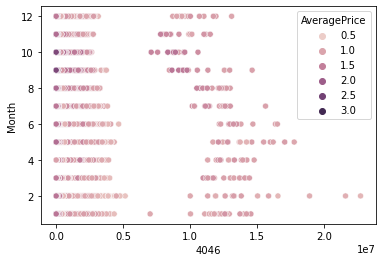

In [26]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=data)
plt.show()

*During the period of August to November the average price is high, and during feb, may the sale of 4046 catogory is good, more kilograms are purchased. Usually the customers prefer 0. to 0.5 values of items*

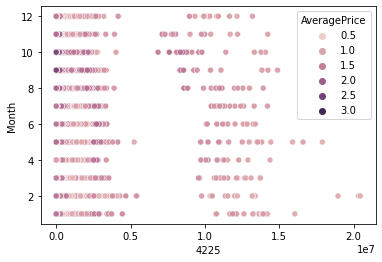

In [27]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=data)
plt.show()

*This figure also shows same results, but 4225 have good quality campared to 4046 and the average price of 4225 is high.*

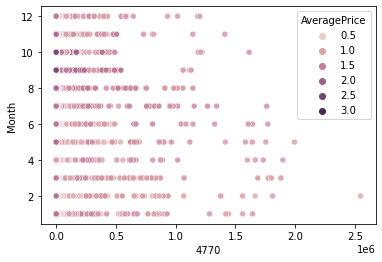

In [28]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4770", y = "Month",hue='AveragePrice',data=data)
plt.show()

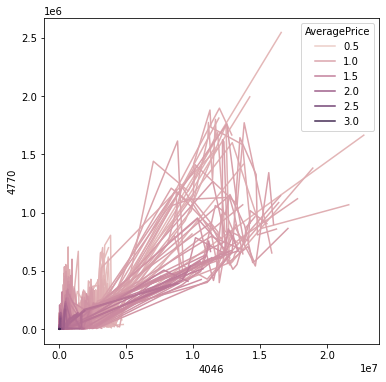

In [29]:
#let us plot count plot of 4046,4225,4770 
plt.figure(figsize=(6,6))
sns.lineplot('4046','4770',data=data,hue='AveragePrice')
plt.show()

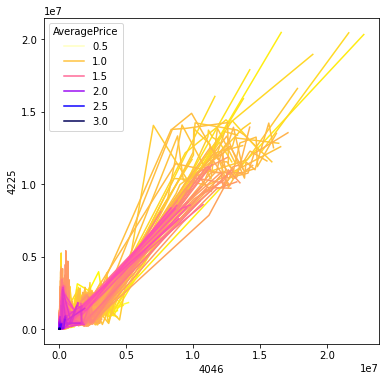

In [30]:
plt.figure(figsize=(6,6))
sns.lineplot('4046','4225',data=data,hue='AveragePrice',palette='gnuplot2_r')
plt.show()

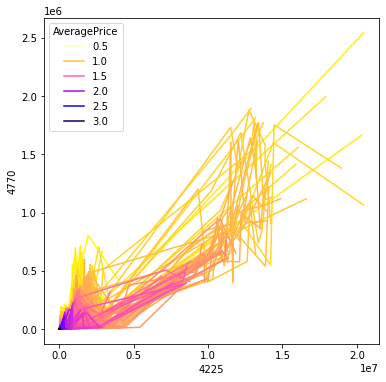

In [31]:
plt.figure(figsize=(6,6))
sns.lineplot('4225','4770',data=data,palette='gnuplot2_r',hue='AveragePrice')
plt.show()

*The high price rate Avacado purchased in very less quantity and lower price rate Avacado were purchased in higher quantity*

# Relationship between year and Total volume:

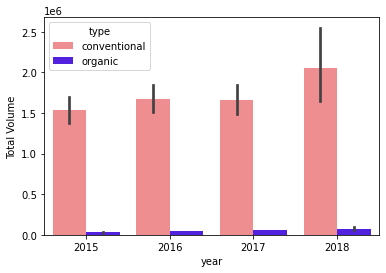

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',hue="type",data=data,palette="gnuplot2_r")
plt.show()

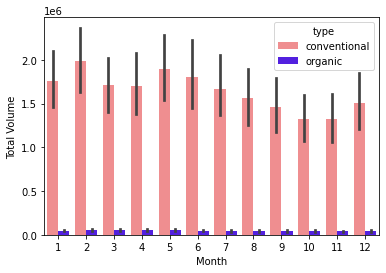

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Total Volume',hue="type",data=data,palette="gnuplot2_r")
plt.show()

**Organic avocados are more expensive. This is obvious because they are more expensive to grow and we all like natural products and are willing to pay a higher price for them. But it's likely that the price of avocado doesn't just depend on the type. Let's look at the price of avocado in different regions in different years. Let's start with organic avocados.**

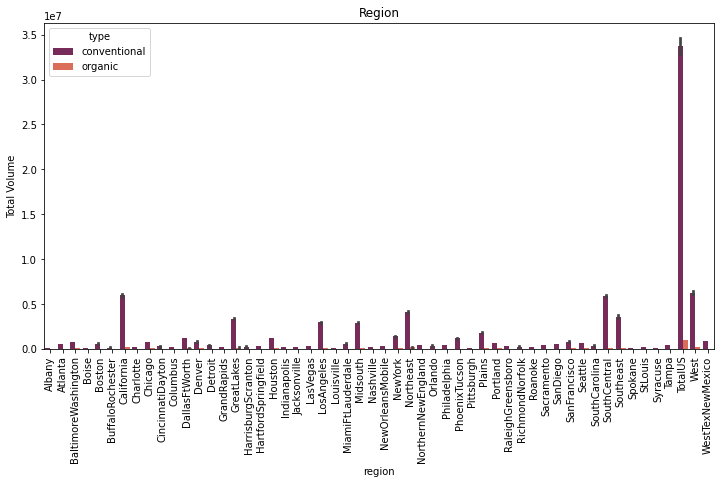

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data["region"],data['Total Volume'],palette="rocket",hue=data['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

These region are where Consumption is very high West
California

SouthCentral

Northeast

Southeast

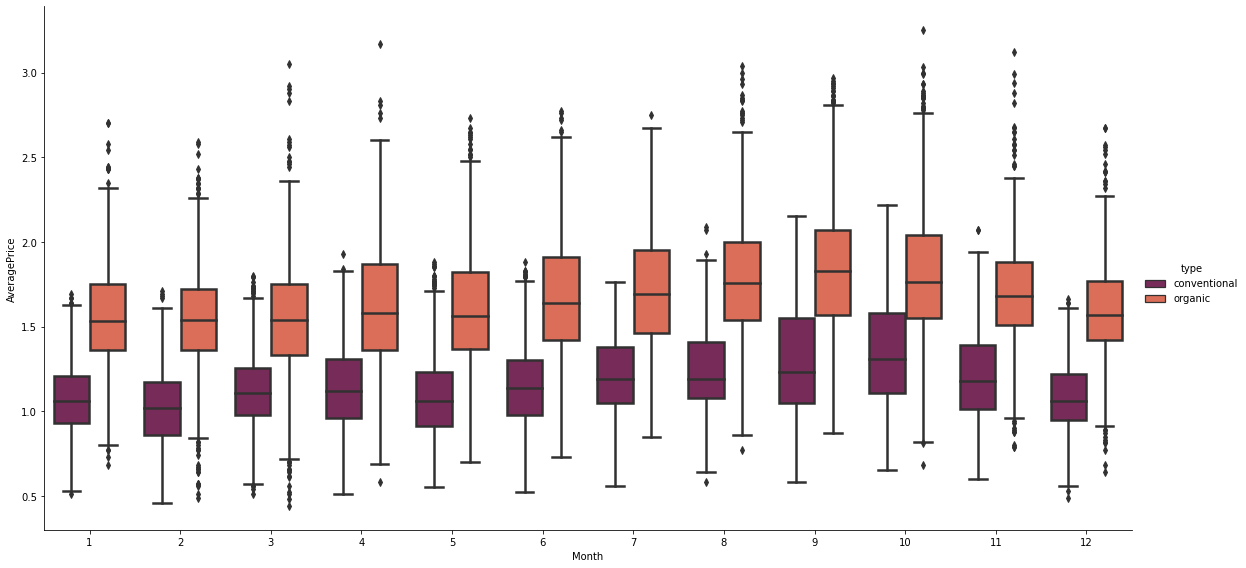

In [35]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=data, height=8, linewidth=2.5, aspect=2,palette="rocket");

We can observe that the price of the Organic type avacoda is high compared to coventional, eariler we observed that the demand for conventional is high, it may be because of less price and easy avability

# Relationship between Total volume and Average Price:

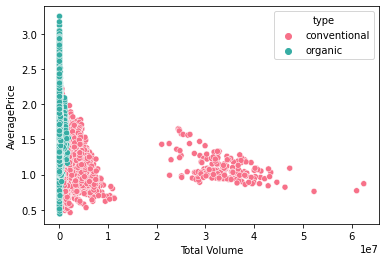

In [36]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=data,palette="husl")
plt.show()

This scatter plot gives the relationship between the total volume and average price on the basis of type. All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. Because of low price of conventional the higher volumns were purchase were conventional.

# Comparison between PLU sold vs day:

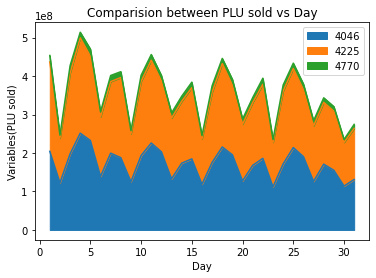

In [37]:
variables = data[['4046', '4225', '4770']].groupby(data.Day).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

This plot shows that PLU 4046, 4225 were sold higher than 4770, 4770 will be have higher price

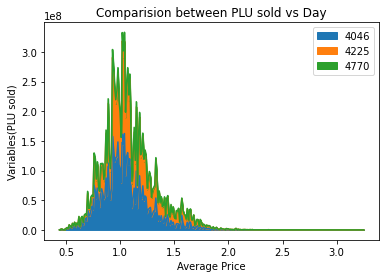

In [38]:
# Type of PLU sold and Average Price
variables = data[['4046', '4225', '4770']].groupby(data.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Average Price")
plt.ylabel("Variables(PLU sold)")
plt.show()

Above plot shows that PLU 4770 has higher rate in comparison than other two.

# Comparison between the Total Bags and Total Volume:

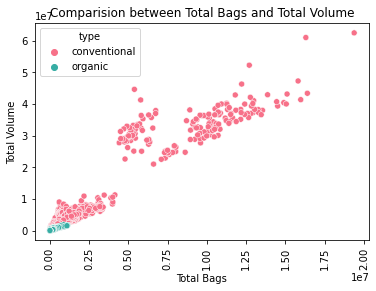

In [39]:
plt.figure(figsize=(6,4))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=data,palette="husl")
plt.xticks(rotation=90)
plt.show()

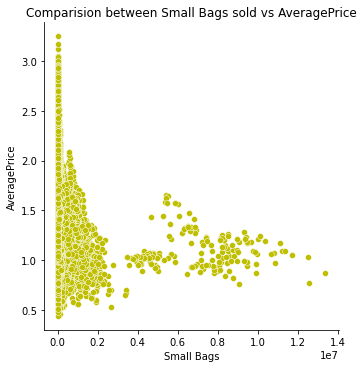

In [41]:
# Comparision between Small Bags sold vs AveragePrice:
sns.relplot(data['Small Bags'],data['AveragePrice'],color="y");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

**Conclusion:**
1.Continous columns have skewness

2.Spike in average price in the year 2017 as the demand was little high in SanFranciso region.

3.Price is very high in HartfordSpringfield Region.

4.Consumption is very high in West region

5.If we think back to the box plot, we can see that Organic cost roughly 34% more than Conventional.

6.When looking over their average volume sold, we see that in 2019 Organic Avocados roughly sold 72,000-units, Conventional Avocados sold around 2,000,000-units. Taking these two averages, Organic Avocados sold roughly 186% more than Conventional.

7.After cleaning, compiling, and organizing the relevant datasets we can see that Organic Avocados are consistently more expensive than Conventional Avocados. Conversely, we see that Conventional Avocados have a higher average volume sold than Organic.These results pose an inverse relationship between cost and units sold ultimately suggesting that the lower cost leads to higher sales.

# Checking for outliers:

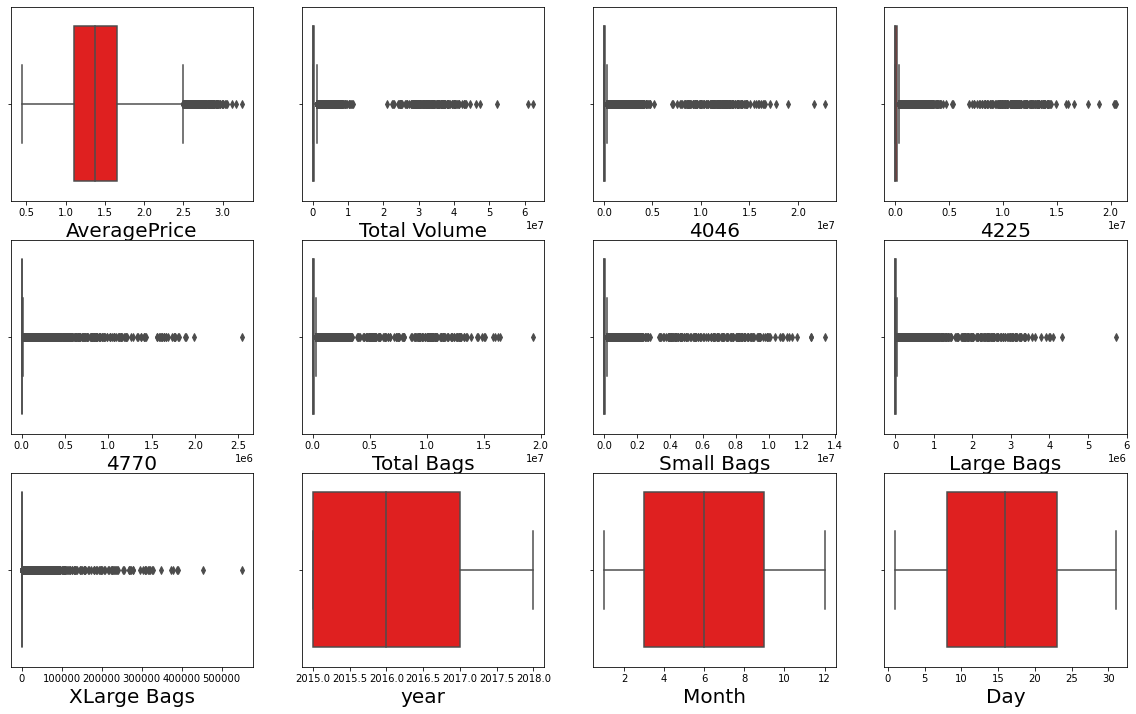

In [42]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Above plotting shows The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, as its our target variable we will not remove outliers from it.

# Zscore method

In [43]:
# Features containing outliers
feature_cols = data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [44]:
# Creating new dataframe by removing zscore
new_df = data[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [45]:
data.shape

(18249, 14)

In [46]:
new_df.shape

(17782, 14)

In [47]:
# % of data loss 
(18249-17782)/18249*100

2.55904433119623

Data loss of only 2.55 % which is affordable

# IQR (Inter Quantile Range) method:

In [48]:
# 1st quantile
Q1=feature_cols.quantile(0.25)

# 3rd quantile
Q3=feature_cols.quantile(0.75)

# IQR
IQR=Q3 - Q1
new_df2=data[~((data <(Q1-1.5 * IQR))|(data >(Q3 + 1.5 * IQR))).any(axis=1)]
new_df2.shape

(11747, 14)

In [49]:
# %of data loss
(18249-11747)/18249*100

35.62934955340019

About 35.62% of data is lost, so we cannot use this method , So we will proceed with zscore method which is affordable for us

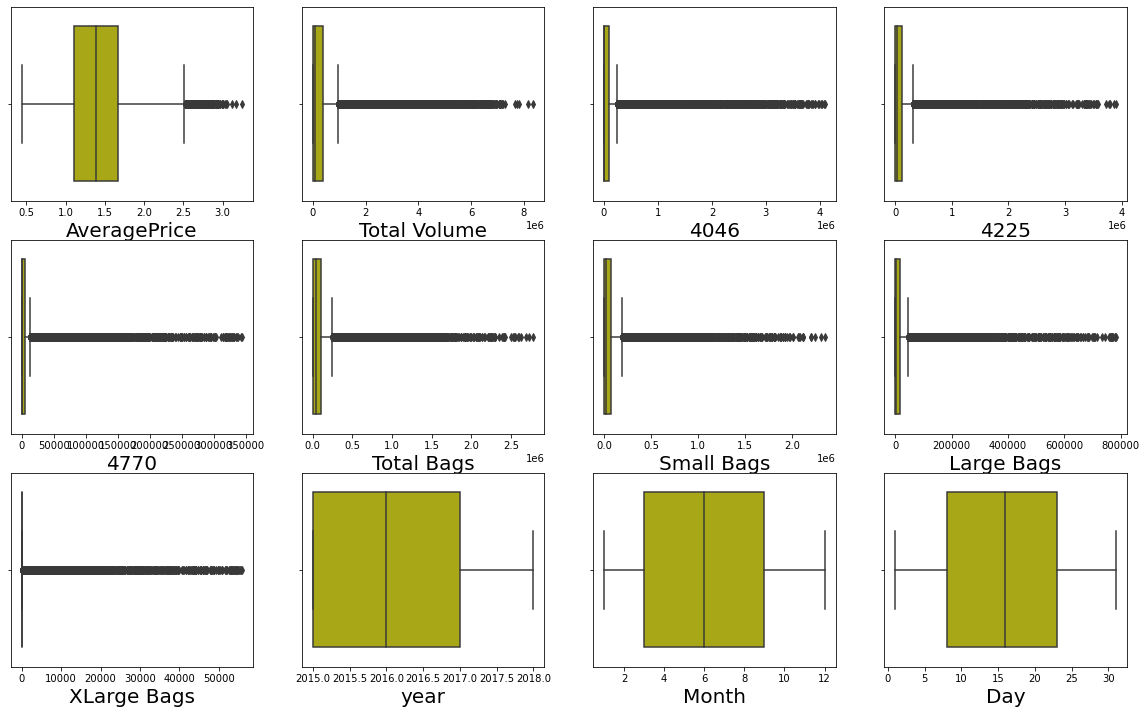

In [50]:
# again plotting to check the status of outlier amount:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


The amount of outliers are reduced, now we will proceed remove skewness

# Checking and removing Skewness:

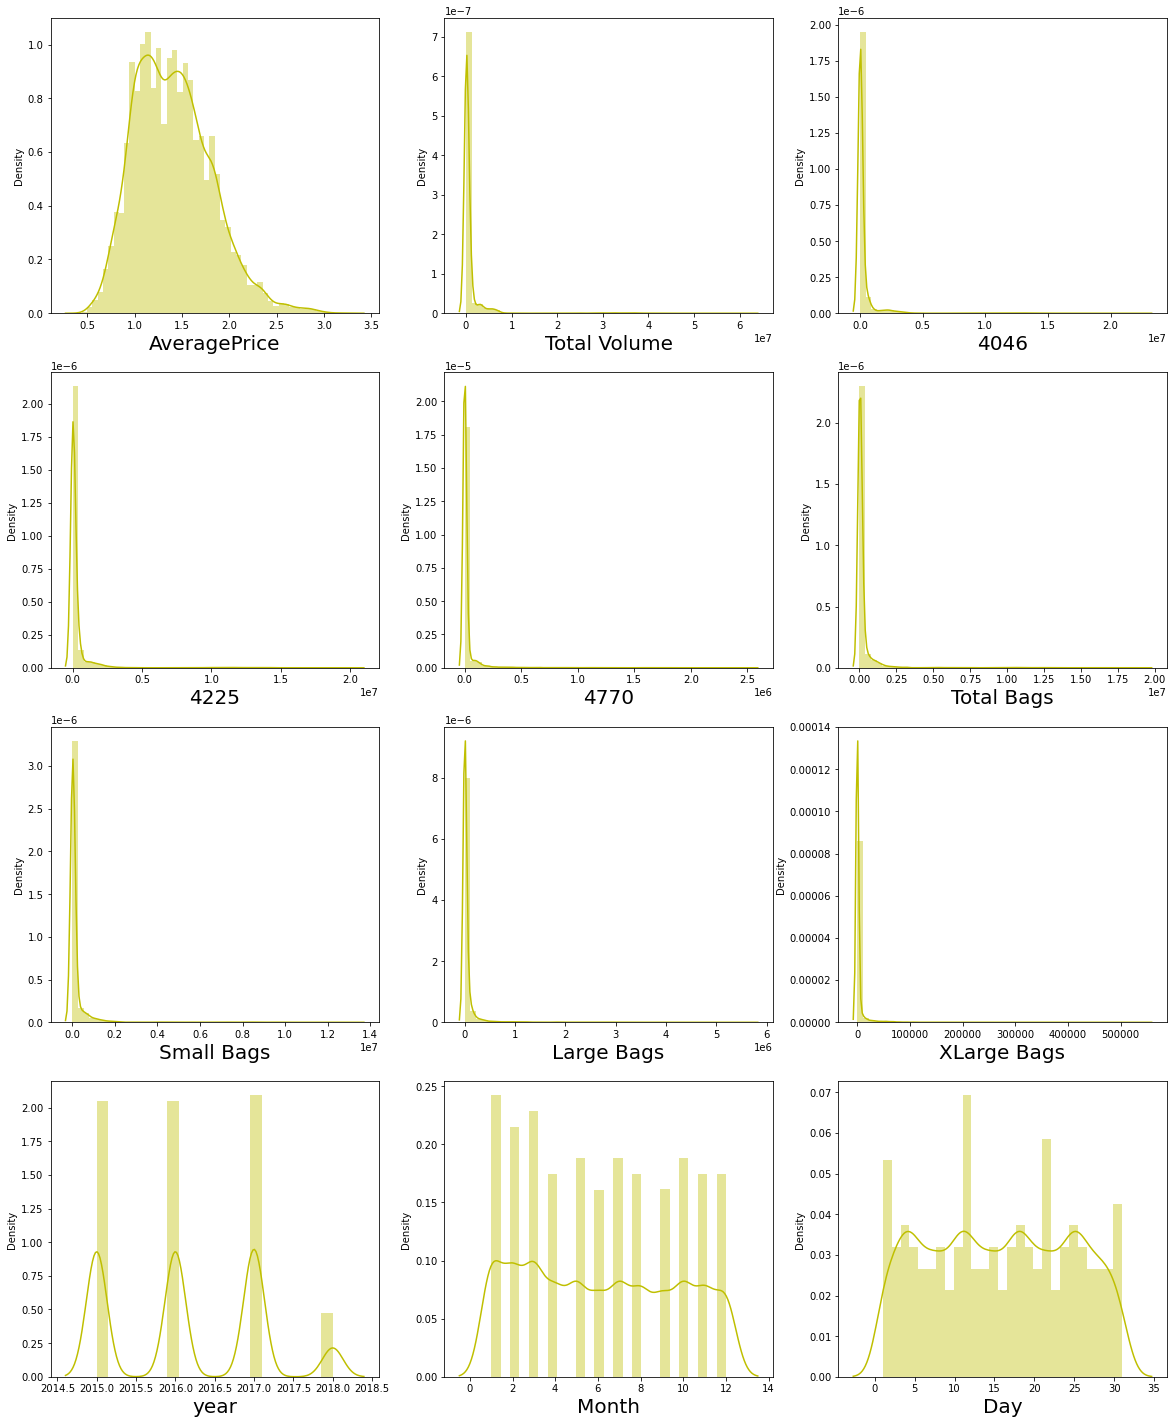

In [51]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can notice skewness in almost all columns except year, month and Day.

In [52]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [53]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [54]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Almost evry skewness is removed but still Xlarge Bags have some skewness let us check with graph and try .remove it

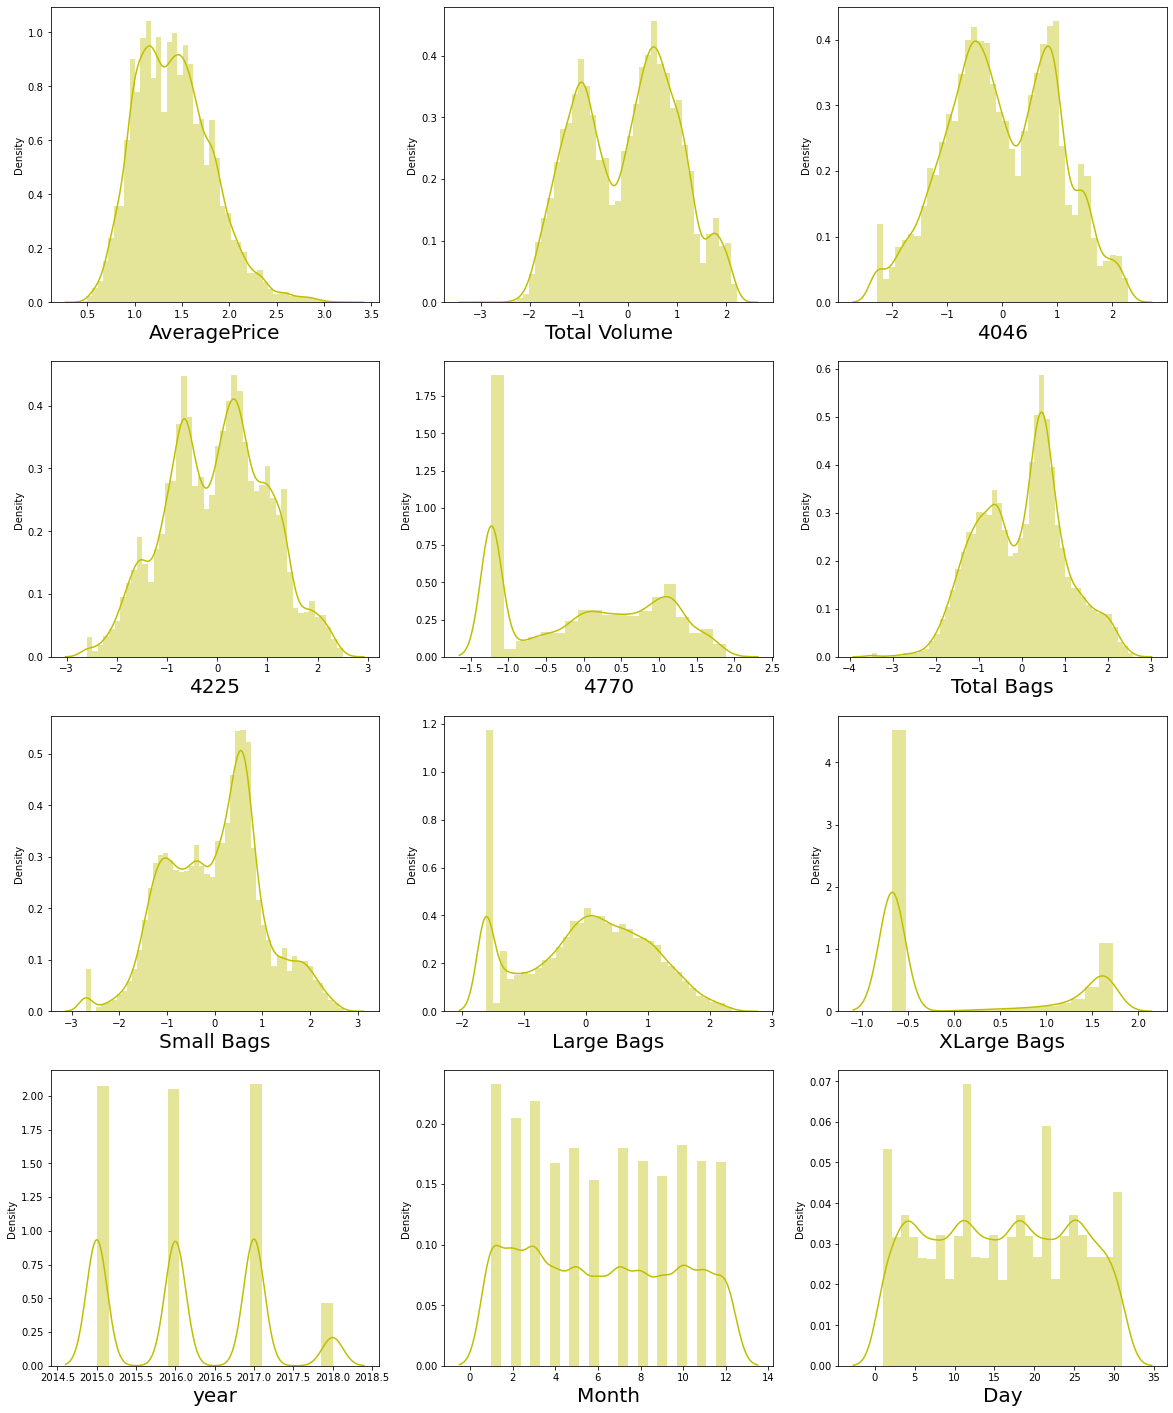

In [55]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

so above graph shows that there is skewness in Xlarge column . we will try to remove it using log1 method.

In [56]:
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [57]:
# let us try one more time for removal
f1=["XLarge Bags"]
new_df[f1] = sk.fit_transform(new_df[f1].values)
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.765164
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Removed skewness from our dataset

# Encoding:

In [58]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Correlation using HEAT map:

In [59]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.393528,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.627310,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573589,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.580290,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.615107,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.609370,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.597809,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.449473,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.393528,0.627310,0.573589,0.580290,0.615107,0.609370,0.597809,0.449473,1.000000,-0.673864,0.153607,-0.015786,0.022063,0.011528
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.673864,1.000000,0.007399,0.021970,-0.005044,-0.002469


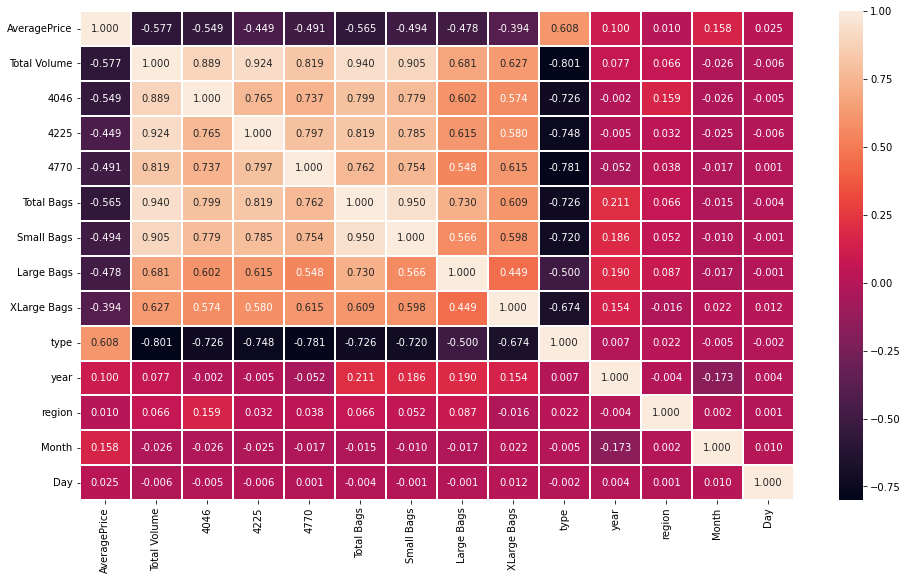

In [60]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation.

In [61]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.393528
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualizing the correlation between label and features using bar plot

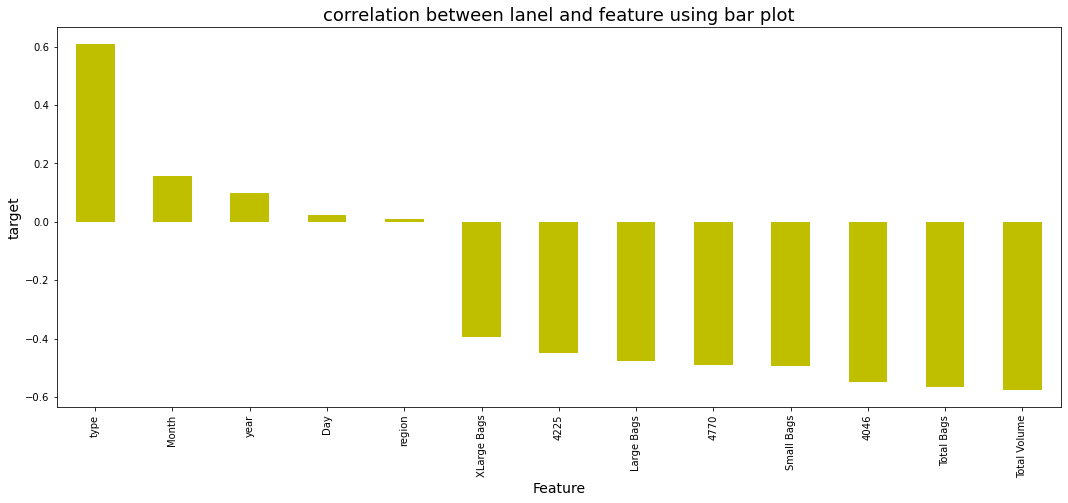

In [62]:
plt.figure(figsize=(18,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()


The features region and XLarge Bags have very less correlation with the target so we can drop these columns.

In [63]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.689355,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.689355,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.689355,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.689355,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.689355,0,2015,0,11,29


In [64]:
# Saving the data for classification
class_df=new_df
class_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.689355,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.689355,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.689355,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.689355,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.689355,0,2015,0,11,29


In [65]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)

In [66]:
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,1,2018,2,4
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,1,2018,1,28
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,1,2018,1,21
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,1,2018,1,14


# Separating the features and label variables into x and y:

In [67]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

# Standard Scalarization Method

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443,-1.214908,1.641434,1.289235
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443,-1.214908,1.641434,0.491750
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443,-1.214908,1.641434,-0.305734
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443,-1.214908,1.641434,-1.103219
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443,-1.214908,1.358706,1.517088
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,0.974238,1.979143,-1.185845,-1.331072
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,0.974238,1.979143,-1.468572,1.403161
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,0.974238,1.979143,-1.468572,0.605677
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,0.974238,1.979143,-1.468572,-0.191808


# Checking VIF values for multicollinearity:

In [69]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,51.519431,Total Volume
1,6.752126,4046
2,11.107325,4225
3,3.890095,4770
4,34.408868,Total Bags
5,16.622534,Small Bags
6,3.460516,Large Bags
7,3.320393,type
8,1.332874,year
9,1.048738,Month


In [70]:
x.drop("Total Bags",axis=1, inplace=True)

In [71]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,36.655341,Total Volume
1,6.032782,4046
2,9.932006,4225
3,3.886417,4770
4,7.643315,Small Bags
5,2.102990,Large Bags
6,3.283398,type
7,1.305229,year
8,1.046372,Month
9,1.000594,Day


Now VIF is less than 10 ow VIF is less than 10 

# Building a model:

In [72]:
# Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8010386317475304  on Random_state  49


We are getting maximum R2 score 80.10% on the basis of Random state 49.

In [73]:
#Creating new train test split at best randoem state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [74]:
#Regression Algorithms
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

# RANDOM FOREST REGRESSOR

In [75]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8665037719400043
MAE: 0.10330479850046861
MSE: 0.02201811540581068
RMSE: 0.14838502419654984
Cross_Validaton_Score 0.20200863472254826


# Support Vector Machine Regressor

In [76]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',mean_absolute_error(y_test, predsvr))
print('MSE:',mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7698854556589798
MAE: 0.14193809914214917
MSE: 0.03795379590484803
RMSE: 0.19481733984645214
Cross_Validaton_Score 0.18605815975802625


# Linear Regression

In [77]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5470411520986231
MAE: 0.21089548137234337
MSE: 0.07470847927398652
RMSE: 0.2733285189547306
Cross_Validaton_Score 0.20217204304746278


# Gradient Descent Regressor:

In [78]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',mean_absolute_error(y_test, predSGD))
print('MSE:',mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5440418998247344
MAE: 0.2119404651127171
MSE: 0.07520315903878064
RMSE: 0.2742319438701127
Cross_Validaton_Score 0.19245770347512514


# KNN Regressor

In [79]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.8010386317475304
MAE: 0.13058144329896906
MSE: 0.032815566635426424
RMSE: 0.18115067384756378
Cross_Validaton_Score 0.12260919939063734


# GradientBoosting Regressor:

In [80]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7144793234474924
MAE: 0.162971437159996
MSE: 0.04709217105559663
RMSE: 0.2170073064567104
Cross_Validaton_Score 0.3474807682526827


**From the difference between R2 score and Cross Validation Score, we can conclusion that KNeighbors Regressor will be our best fitting model.**

# Hyperparameter Tuning:

In [81]:
from sklearn.model_selection import GridSearchCV
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [82]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [83]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}

In [84]:
avocado_model =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado_model.fit(x_train, y_train)
pred = avocado_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.14838502419654984
R2_Score: 80.44624045546817


# Saving the model

In [85]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado_model,"Avocado_price.pkl")

['Avocado_price.pkl']

# Predicting the saved model:

In [86]:
# Let's load the saved model and get the prediction

model=joblib.load("Avocado_price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.21706048, 1.6864147 , 1.83119111, ..., 1.70415885, 1.57562641,
       1.05154902])

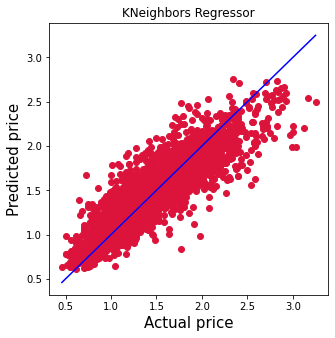

In [87]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

In [88]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
result

,Original,Predicted
0,1.19,1.217060
1,1.88,1.686415
2,1.82,1.831191
3,1.04,0.974715
4,1.10,1.330230
...,...,...
5330,1.66,1.709897
5331,0.70,0.755105
5332,1.54,1.704159
5333,1.60,1.575626


# Classification Problem- Finding the Region from these data


In [90]:
data= pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [91]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [92]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [93]:
data.shape

(18249, 14)

In [94]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [95]:
class_df = data

# Encoding the categorical columns using Label Encoding

In [96]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
class_df[categorical_col]= class_df[categorical_col].apply(LE.fit_transform)
class_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# correlation

In [97]:
class_df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


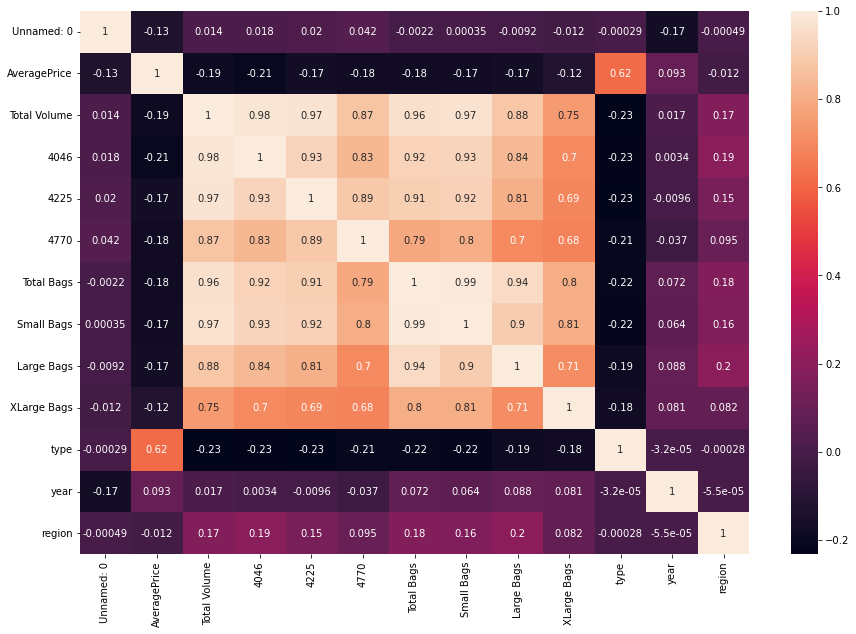

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(class_df.corr(),annot=True)
cor=class_df.corr()

In [99]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
Unnamed: 0     -0.000489
AveragePrice   -0.011716
Name: region, dtype: float64

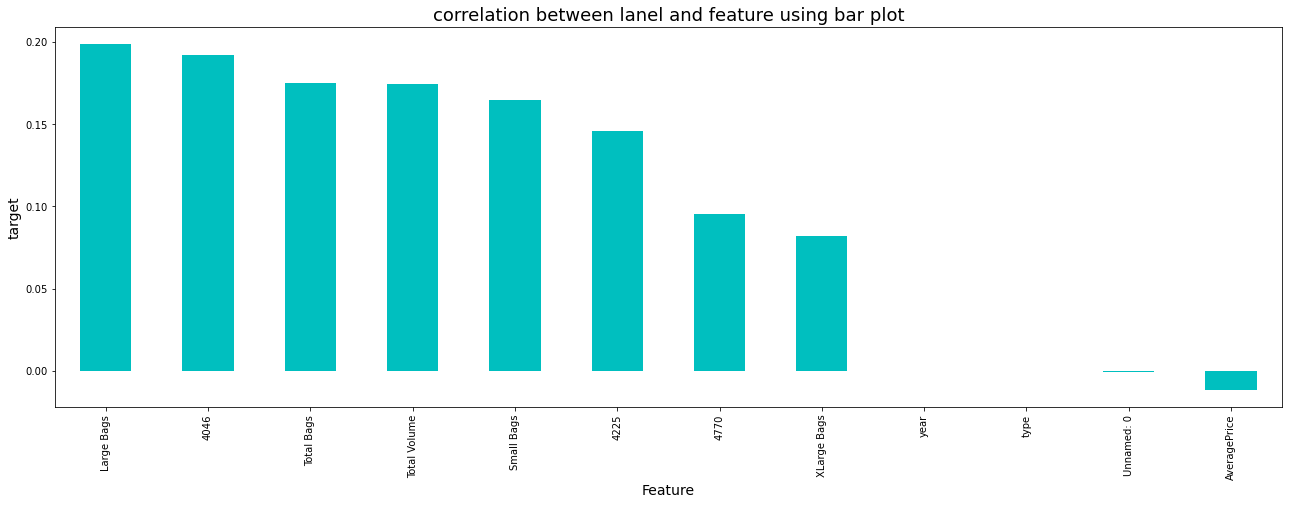

In [100]:
plt.figure(figsize=(22,7))
class_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [101]:
# Dropping irrelevant columns
class_df.drop("Date",axis=1, inplace=True)
class_df.drop("year",axis=1, inplace=True)

In [102]:
x = class_df.drop("region", axis=1)
y = class_df["region"]
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [104]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.036026e+00,Unnamed: 0
1,1.708597e+00,AveragePrice
2,4.919440e+09,Total Volume
3,6.600171e+08,4046
4,5.980301e+08,4225
5,4.763436e+06,4770
6,2.370316e+14,Total Bags
7,1.364727e+14,Small Bags
8,1.448103e+13,Large Bags
9,7.621400e+10,XLarge Bags


In [105]:
x.drop('Total Volume',inplace=True,axis=1)

In [106]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.034805e+00,Unnamed: 0
1,1.708413e+00,AveragePrice
2,1.006420e+01,4046
3,1.347443e+01,4225
4,5.378730e+00,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.448103e+13,Large Bags
8,7.621336e+10,XLarge Bags
9,1.686748e+00,type


In [107]:
x.drop('Total Bags',axis=True,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.034688,Unnamed: 0
1,1.708412,AveragePrice
2,10.061400,4046
3,13.472625,4225
4,5.378704,4770
5,19.342873,Small Bags
6,5.544875,Large Bags
7,3.414144,XLarge Bags
8,1.686706,type


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8012785388127854  on Random_state  51


In [109]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=71)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree 

In [111]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7861187214611872
[[81  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  2]
 [ 0  0 94 ...  0  0  2]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  0 98  0]
 [ 0  2  2 ...  0  0 61]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       104
           1       0.68      0.74      0.71        97
           2       0.89      0.85      0.87       110
           3       0.69      0.77      0.72        94
           4       0.82      0.88      0.85        97
           5       0.79      0.79      0.79       110
           6       0.90      0.96      0.93        99
           7       0.83      0.86      0.85       112
           8       0.96      0.87      0.91       114
           9       0.80      0.83      0.81       109
          10       0.72      0.61      0.66       103
          11       0.79      0.87      0.83        91
          12       0.87      0.87      0.87        93
          13       0.74      0.69      0.71        96
          14  

# Random Forest 

In [112]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8980821917808219
[[ 96   0   0 ...   0   0   0]
 [  0  91   0 ...   0   0   0]
 [  0   0 108 ...   0   0   1]
 ...
 [  0   0   0 ...  97   0   0]
 [  0   0   0 ...   1 104   0]
 [  0   1   2 ...   0   0  71]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       104
           1       0.81      0.94      0.87        97
           2       0.94      0.98      0.96       110
           3       0.81      0.88      0.85        94
           4       0.89      0.94      0.91        97
           5       0.86      0.87      0.87       110
           6       0.96      1.00      0.98        99
           7       0.96      0.92      0.94       112
           8       0.98      0.93      0.95       114
           9       0.92      0.89      0.90       109
          10       0.86      0.85      0.86       103
          11       0.84      0.96      0.89        91
          12       0.94      0.97      0.95        93
          13       0.88      0.8

# Logistic Regression

In [113]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.31196347031963473
[[23  0  0 ...  0  0  0]
 [ 1 23  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 93  1  0]
 [ 0  0  0 ...  3 71  0]
 [ 2  0  0 ...  0  0 18]]
              precision    recall  f1-score   support

           0       0.13      0.22      0.16       104
           1       0.57      0.24      0.34        97
           2       0.69      0.30      0.42       110
           3       0.11      0.34      0.16        94
           4       0.30      0.23      0.26        97
           5       0.64      0.13      0.21       110
           6       0.55      0.69      0.61        99
           7       0.35      0.08      0.13       112
           8       0.33      0.53      0.40       114
           9       0.36      0.44      0.40       109
          10       0.27      0.12      0.16       103
          11       0.14      0.47      0.22        91
          12       0.45      0.42      0.43        93
          13       0.31      0.32      0.32        96
          14 

# Support Vector Machine

In [114]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.2389041095890411
[[ 8  0  0 ...  0  0  0]
 [ 1 13  0 ...  0  0  6]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 83  2  0]
 [ 0  0  0 ...  1 68  0]
 [ 0  3  0 ...  0  0 32]]
              precision    recall  f1-score   support

           0       0.07      0.08      0.07       104
           1       0.38      0.13      0.20        97
           2       0.63      0.24      0.34       110
           3       0.33      0.01      0.02        94
           4       0.28      0.12      0.17        97
           5       0.13      0.08      0.10       110
           6       0.28      0.61      0.39        99
           7       0.00      0.00      0.00       112
           8       1.00      0.50      0.67       114
           9       0.81      0.19      0.31       109
          10       0.05      0.08      0.06       103
          11       0.25      0.41      0.31        91
          12       0.75      0.45      0.56        93
          13       0.72      0.27      0.39        96
          14  

# k nearest Neighbours


In [115]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.31031963470319635
[[21  4  3 ...  0  0  1]
 [ 9 38  1 ...  0  0  0]
 [ 4  2 46 ...  0  0  0]
 ...
 [ 0  0  0 ... 96  1  0]
 [ 0  1  0 ...  1 77  0]
 [ 6  7  2 ...  0  0 36]]
              precision    recall  f1-score   support

           0       0.06      0.20      0.10       104
           1       0.13      0.39      0.20        97
           2       0.23      0.42      0.29       110
           3       0.10      0.29      0.15        94
           4       0.16      0.33      0.22        97
           5       0.11      0.21      0.14       110
           6       0.65      0.69      0.67        99
           7       0.17      0.26      0.20       112
           8       0.42      0.53      0.47       114
           9       0.24      0.38      0.29       109
          10       0.08      0.14      0.10       103
          11       0.25      0.44      0.32        91
          12       0.44      0.51      0.47        93
          13       0.31      0.35      0.33        96
          14 

# cross validation score:


In [116]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.5438014843623887
0.6804102906782492
0.25781370013176813
0.20756560814184408
0.1884423805358571


# HYPERPARAMETER TUNING


In [117]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [118]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'auto', 'n_estimators': 150}


In [119]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=150 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.89954337899545


**By using the GridSeachCV, we are able to find the best param and then find the best accuracy score that is 89% using random forest classifier.**

# SAVE THE MODEL

In [120]:
# Saving the model using .pkl
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

# PREDICTION ON SAVED MODEL


In [121]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction


array([18, 11, 40, ..., 10, 33, 15])

# ROC- AUC curve:


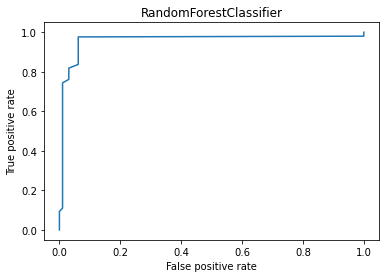

In [122]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

As from this data set we have following conclusion:

taking price as y variable is predicting well for this model as comapared to region
also r2 score value is also greater then accuracy score

In [123]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,18,18
1,11,11
2,40,40
3,27,27
4,19,19
...,...,...
5470,45,45
5471,15,15
5472,10,10
5473,33,33


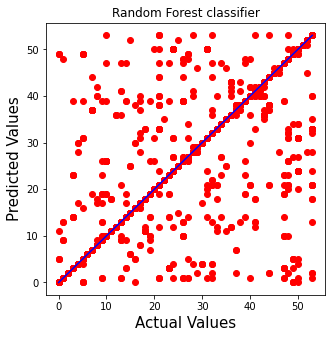

In [124]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()

**Concluding Remarks**

*1.In addition, the score value of R2 is also greater than the accuracy score.*

*2.The average price, the total exchanges and the total volume are well distributed among all the other columns*

*3.There are no outliers in the dataset after replacing it with the mean value.*

*4.Since year is the most negatively correlated column of all columns*

*5.Between August and October the price of avocado is much higher compared to other months.*

*6.Hartford Springfield, San Francisco and New York are having more average price as compared to another region*

*7.As organic type of avocado is having the more price per unit then conventional*

*8.I had done prediction using region and price but using price the prediction score is high as compared to region*

*9.So in this data set we are using both regression and classification technique for making this model*